In [8]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
train = pd.read_csv('train.csv') #zczytywanie danych z  plików train i test
test = pd.read_csv('test.csv')

Sprawdzanie dataframe , wszystkoe wykresy które wykorzystaliśmy do sprawdzenia dataframe i na podstawie których zbudowaliśmy nasz model. 

In [9]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


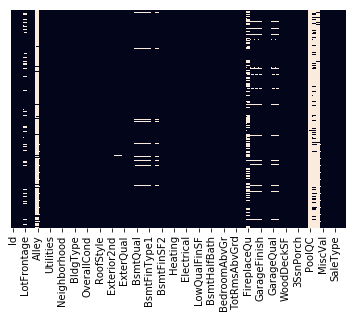

In [10]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False) #Tworzenie mapy z wartościami zerowymi 

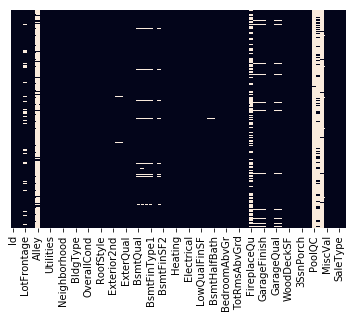

In [11]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

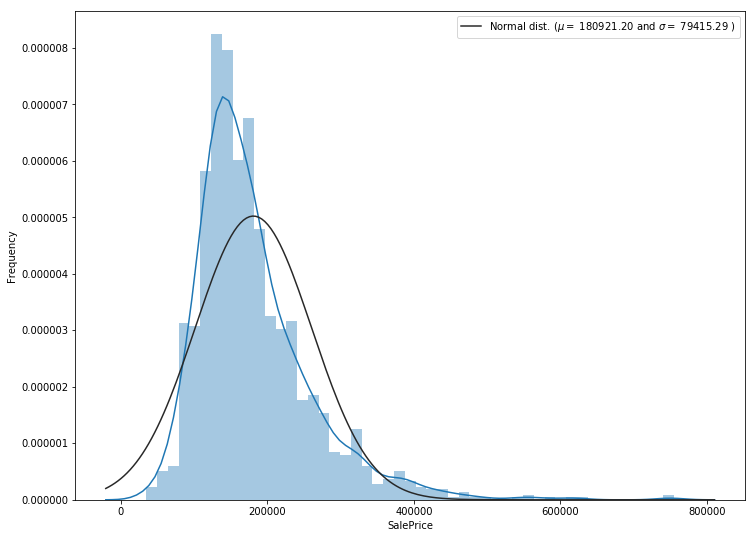

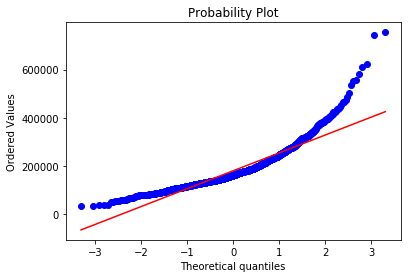

In [12]:
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Tworzymy funkcje i dopasowujemy jej parametry

(mu, sigma) = stats.norm.fit(train['SalePrice'])

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Tworzymy wykres prawdopodobieństwa 
fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

Zauważamy że nasz wykres jest zły ponieważ prawidłowy kształt naszej krzywej powinień przypominać 'dzwon'.Średnia z punktów i maksymalny punkt powinny być sobie równe. 

Próbujemy stworzyć nasz wykres poprzez wykorzystanie funkcji log , funkcja ta znajduje się w bibliotece numpy. 

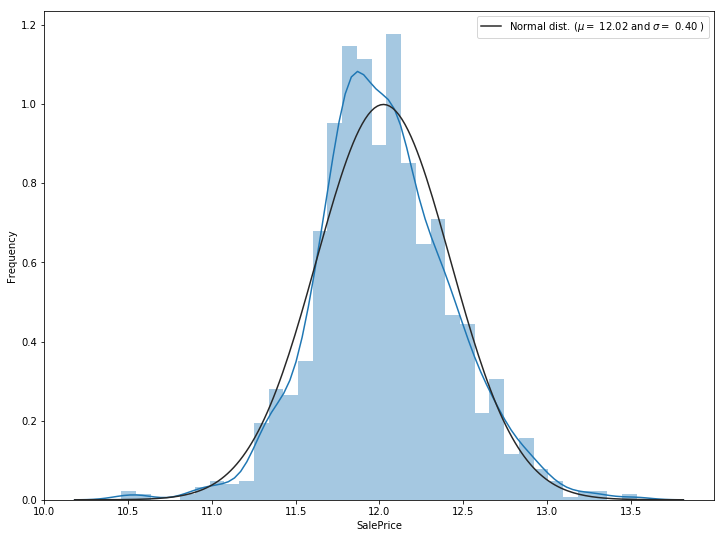

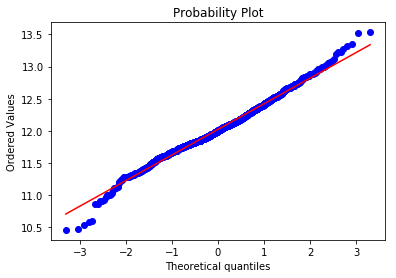

In [13]:
train['SalePrice'] = np.log1p(train['SalePrice'])

plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

(mu, sigma) = stats.norm.fit(train['SalePrice'])

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

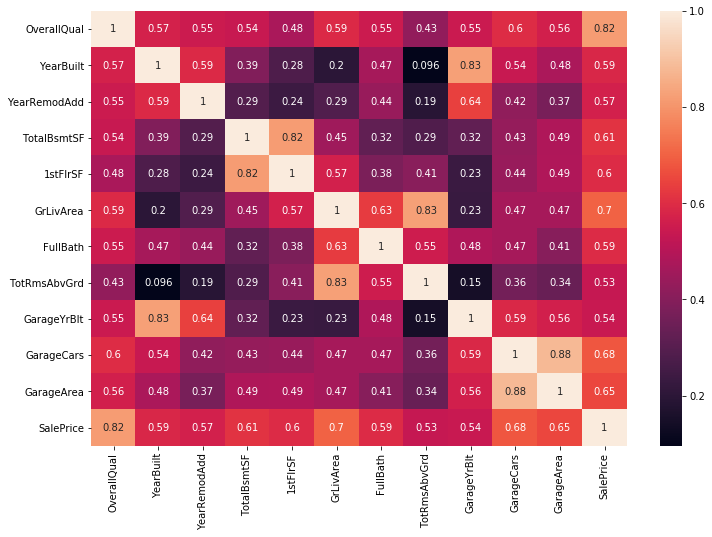

In [18]:
train_corr = train.select_dtypes(include=[np.number]) # odrzucamy zmienne tekstowe i bierzemy tylko zmienne liczbowe 
corr = train_corr.corr()
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

Mapa pokazuje nam korelacje z kolumną SalePrice i możemy zauważyć że najbardziej powiązana z tą kolumną jest kolumna OverallQual